<div class='text-center'>
    <h1>Loan Eligibility Prediction using Machine Learning</h1>
</div>


# Introduction

### In this notebook, The model has been developed to predict loan eligibility of loan applicants.
---

> ### Steps are:


1. [Gathering Data](#1)
2. [Exploratory Data Analysis](#2)
3. [Data Visualizations](#3)
4. [Building ML Model](#4)
5. [Training the ML Model](#5)
6. [Predict Model](#6)
7. [Deploy Model](#7)


# <div class="text-primary"> The Problem  </div>

### In Simple Terms, Company wants to automate the Loan Eligibility Process in a real time scenario when customer's details are provided while applying for home loans.


Training set has been used to build the model, and test set for validation. Both the files are present as CSV files, their URLs are already available in the sample code.



# Import Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:

# Show the Dataset Path to get detaset

import os

for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/loan-test.xls
/content/loan-train.xls
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2023.12.14/14.24.33.618869.log
/content/.config/logs/2023.12.14/14.23.34.713490.log
/content/.config/logs/2023.12.14/14.24.22.589063.log
/content/.config/logs/2023.12.14/14.24.13.486496.log
/content/.config/logs/2023.12.14/14.24.32.746549.log
/content/.config/logs/2023.12.14/14.24.03.311767.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv


 You can load this data using `read_csv()` method from `pandas` package which converts the data set to a python dataframe.


## Dataset Key Information.
  
---  
  
> - `Loan_ID`--------------> Unique Loan ID.
- `Gender`   --------------> Male/ Female
- `Married`  --------------> Applicant married (Y/N)
- `Dependents` ------------> Number of dependents
- `Education` -------------> Applicant Education (Graduate/ Under Graduate)
- `Self_Employed` ---------> Self-employed (Y/N)
- `ApplicantIncome` -------> Applicant income
- `CoapplicantIncome` -----> Coapplicant income
- `LoanAmount`  -----------> Loan amount in thousands
- `Loan_Amount_Term` ------> Term of the loan in months
- `Credit_History` --------> Credit history meets guidelines
- `Property_Area` ---------> Urban/ Semi-Urban/ Rural
- `Loan_Status` -----------> Loan approved (Y/N)

<a id="1"></a><br>
# 1. Gathering Data

In [4]:
#  Create New Variable and stores the dataset values as Data Frame

loan_train = pd.read_csv('/content/loan-train.xls')
loan_test = pd.read_csv('/content/loan-test.xls')

- Lets display the some information from our large datasets

In [5]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Also we can get the shape of the dataset using `shape` attribute.
Output : (rows,columns)

In [6]:
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


> ### *After we collecting the data, Next step we need to understand what kind of data we have.*

### Also we can get the column as an list(array) from dataset

> **Note: DataFrame.columns returns the total columns of the dataset.

In [12]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Now, Understanding the Data

- Using `loan_train.describe()` method to show the important information from the dataset.
- It provides the `count`, `mean`, `standard deviation (std)`, `min`, `quartiles` and `max` as its output.

In [7]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


####Above cell represents the information of all the methamatical details from dataset. Like `count`, `mean`, `standard deviation (std)`, `min`, `quartiles(25%, 50%, 75%)` and `max`.

> ### Another method is `info()`, This method show us the information about the dataset, Like

1. What's the data type of culumn?
- How many rows available in the dataset?
- What are the features are there?
- How many null values available in the dataset?
- And so on...

In [8]:
loan_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<a id="2"></a><br>
# 2. Exploratory Data Analysis

In this section, We learn about extra information of the data and it's characteristics.


In [13]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())


In [14]:
for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


Data Preprocessing : handling nulls and missing values


- We need to fill null values with `mean` and `median` using `missingno` package

In [15]:
import missingno as msno

In [16]:
# list of how many percentage values are missing
loan_train

loan_train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

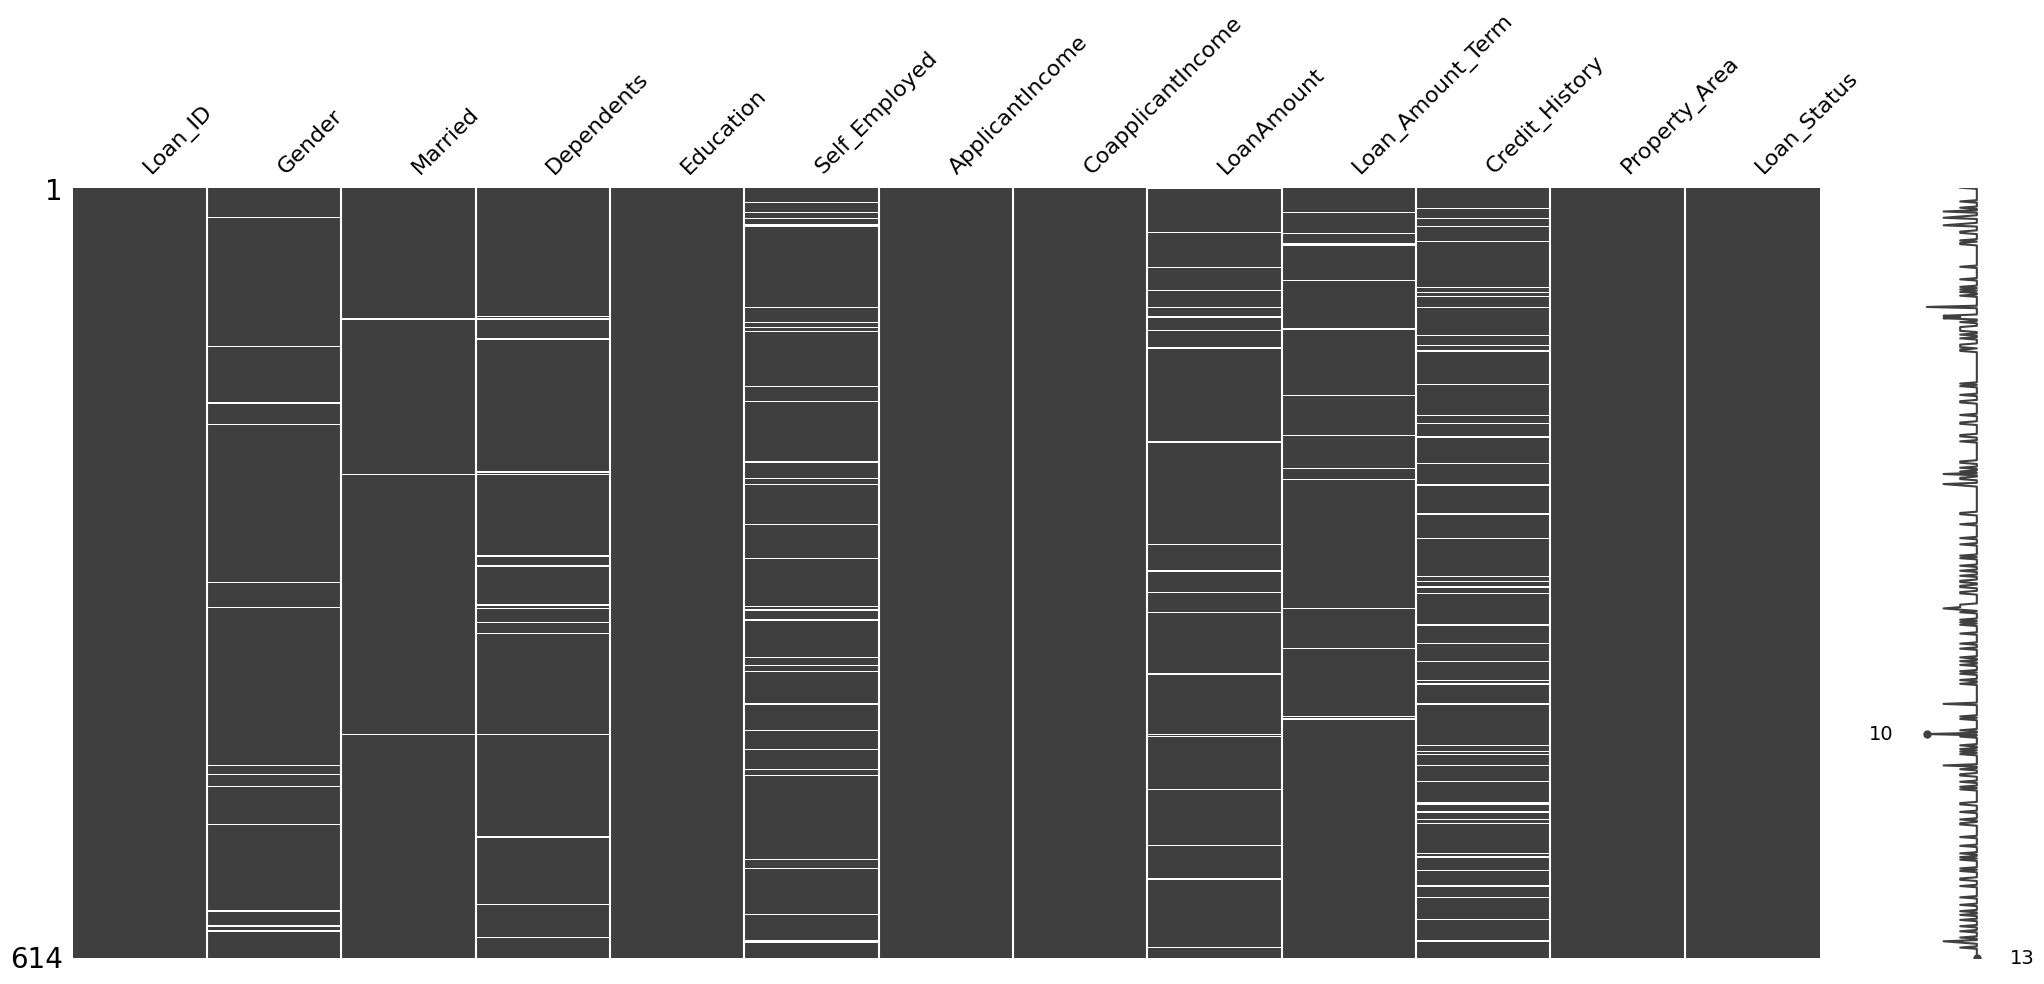

In [17]:
msno.matrix(loan_train )


- As we can see here, there are too many columns missing with small amount of null values so we use `mean` amd `mode` to replace with `NaN` values.

In [18]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

### # convert Categorical variable with Numerical values.

`Loan_Status` feature boolean values, So we replace `Y` values with `1` and `N` values with `0`
and same for other `Boolean` types of columns

In [19]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})


In [20]:

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)


* Here, `Property_Area`, `Dependents` and `Education` has multiple values so now we can use `LabelEncoder` from `sklearn` package

In [21]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

<a id="3"></a><br>
# 3. Data Visualizations


In this section, We are showing the visual information from the dataset, For that `matplotlib` and `seaborn` are used.



In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')


In [ ]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


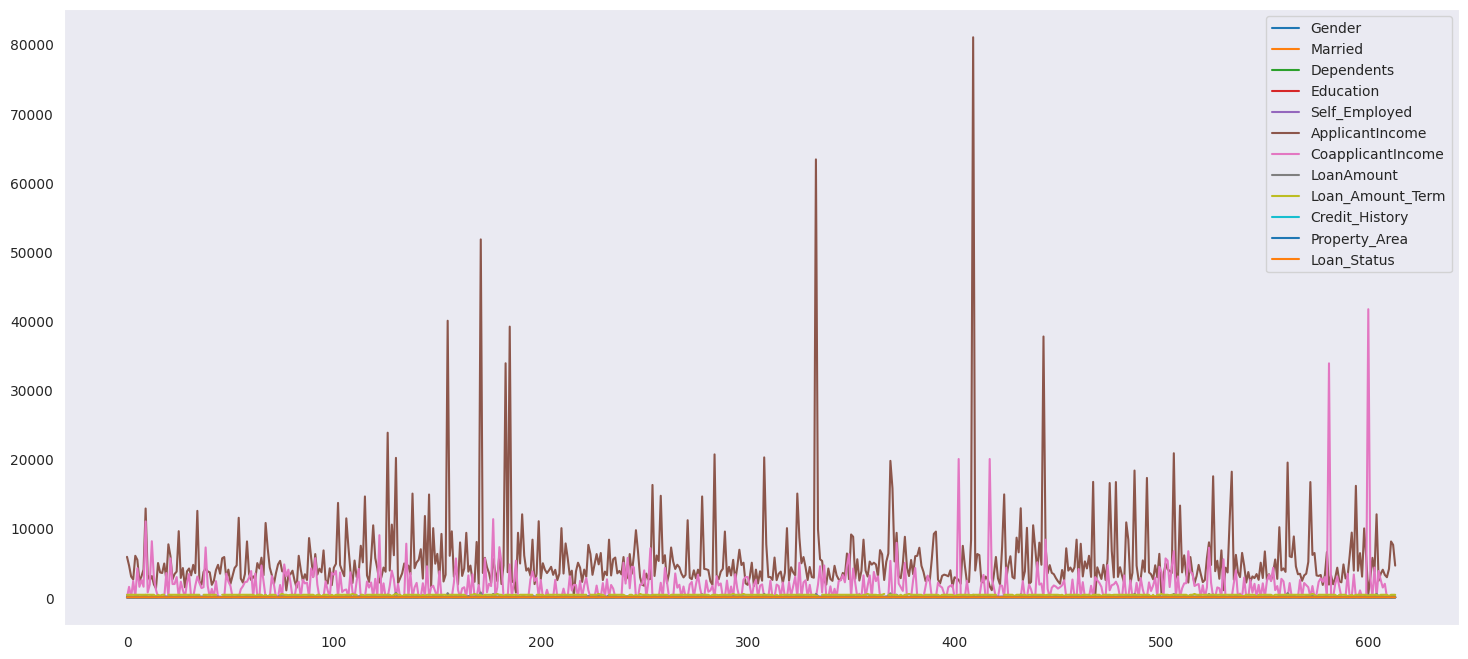

In [23]:
loan_train.plot(figsize=(18, 8))

plt.show()

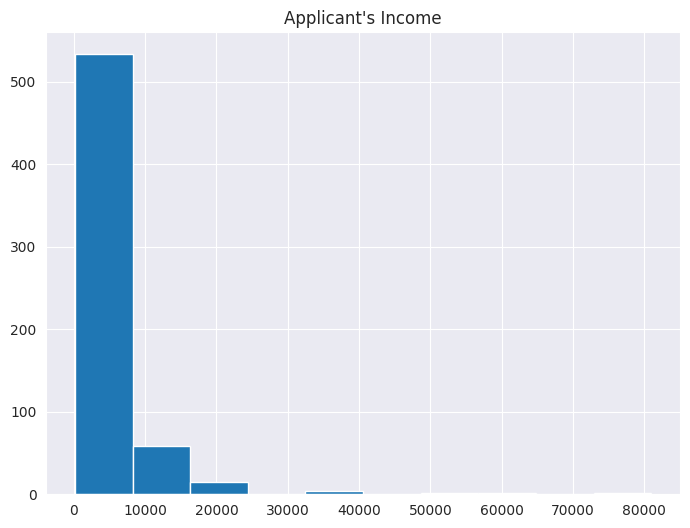

In [24]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Applicant's Income")

plt.show()

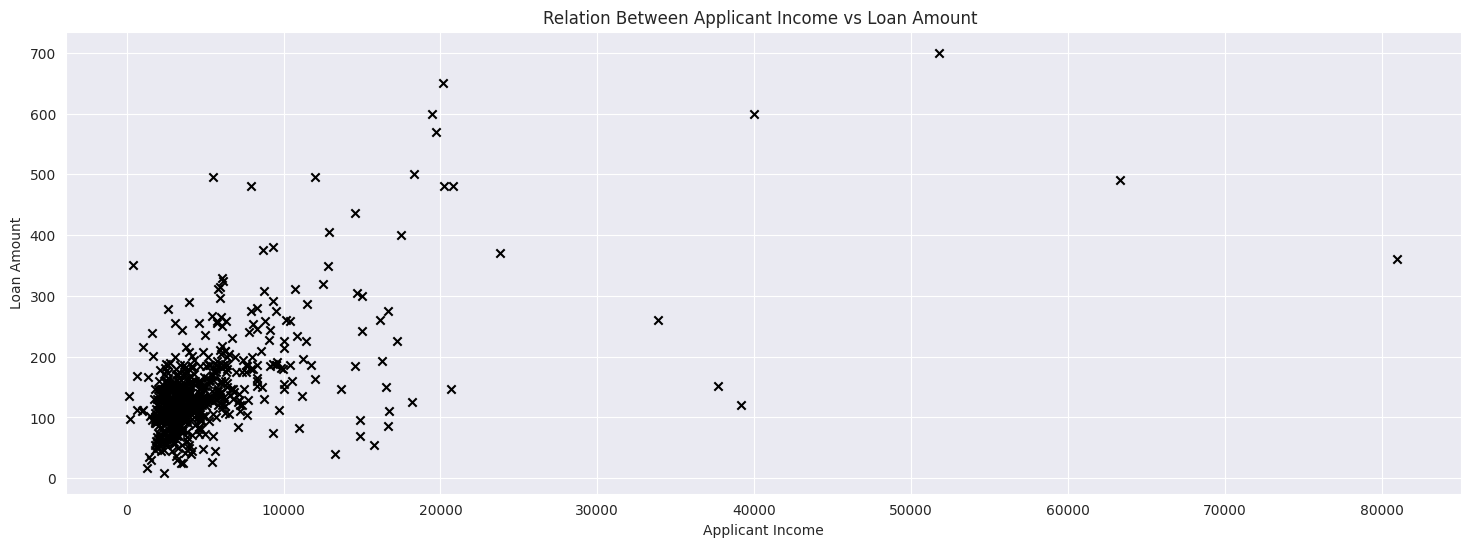

In [25]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

<ipython-input-26-13c5e0f78462>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


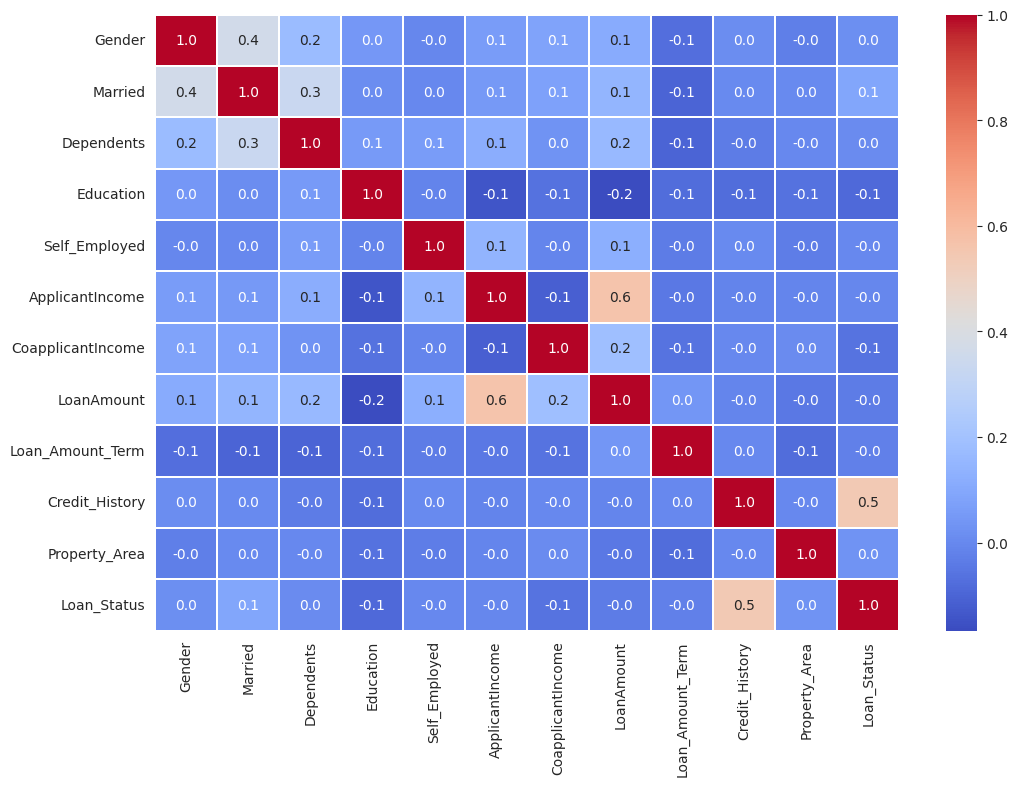

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In this heatmap, we can clearly see the relation between two features/columns of the dataset

<a id="4"></a><br>
# 4. Building ML Model.

* In this step, Since we have lots of Machine Learning Model from sklearn package, and we need to decide and choose which model gives us the better performance, then we use that model in final stage and send it to the production level.

* Let's build the model

In [27]:
xgbc=XGBClassifier(n_estimators=2800,
    min_child_weight=0.1,
    learning_rate=0.002,
    max_depth=2,
    subsample=0.47,
    colsample_bytree=0.35,
    gamma=0.4,
    reg_lambda=0.4,
    random_state=42,
    n_jobs=-1,)

<a id="5"></a><br>
# 5. Training the ML Model

> ### Before fitting the model, We need to decide how many feature are important for testing and training
- Currently, we are using 'Property_Area', 'Education', 'Dependents','Credit_History', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term' features for training so let's create train and test variables

In [28]:
train_features = ['Property_Area','Education', 'Dependents','Credit_History','ApplicantIncome','LoanAmount','Loan_Amount_Term']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values


In [29]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.35, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.002, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=0.1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2800, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

<a id="6"></a><br>
# 6. Predict Model

In [30]:
# Predict the model for testin data

predicted = xgbc.predict(x_test)


In [31]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = xgbc.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))


accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [32]:

# predict the target on the test dataset
predict_test = xgbc.predict(x_test)
print('Target on test data',predict_test)


Target on test data [1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1]


<a id="7"></a><br>
# 7. Deploy Model


- The last step is to deploy our model in production map. So we need to export our model and bind with web application API.

- Using pickle we can export our model and store in to `model.pkl` file, so we can easily access this file and calculate customized prediction using Web App API.

In [33]:
import pickle as pkl

In [34]:
# save the model to disk
filename = 'model.pkl'
pkl.dump(xgbc, open(filename, 'wb')) # wb means write as binary




- To read model from file

```
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, Y_test)

```